## Introduction

## Importing Libraries and Loading Images

### Libraries

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

### TroubleShooting

In [40]:
#Get all of the data into each generator and modify the images
train_regen = ImageDataGenerator(rescale=1./255)
test_regen = ImageDataGenerator(rescale=1./255)
val_regen = ImageDataGenerator(rescale=1./255)

In [58]:
train_generator = train_regen.flow_from_directory(train_data_dir,
                                                  target_size = (128, 128),
                                                  batch_size = 500,
                                                  color_mode = 'grayscale',
                                                  class_mode = 'binary')
                                                  
test_generator = test_regen.flow_from_directory(test_data_dir,
                                                target_size = (128, 128),
                                                batch_size = 200,
                                                color_mode = 'grayscale',
                                                class_mode = 'binary')

val_generator = val_regen.flow_from_directory(val_data_dir,
                                              target_size = (128, 128),
                                              batch_size = 200,
                                              color_mode = 'grayscale',
                                              class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [63]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

In [64]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [67]:
history = model.fit(train_generator, 
                              steps_per_epoch = len(X_train)//500, 
                              epochs= 5, 
                              validation_data=val_generator, 
                              validation_steps = len(X_test)//200)

Epoch 1/5
1/1 [==============================] - 0s 449ms/step - loss: 0.6989 - acc: 0.2640 - val_loss: 0.7131 - val_acc: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 179ms/step - loss: 0.6270 - acc: 0.7420 - val_loss: 0.7694 - val_acc: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 185ms/step - loss: 0.6204 - acc: 0.7080 - val_loss: 0.7731 - val_acc: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 185ms/step - loss: 0.5863 - acc: 0.7400 - val_loss: 0.8390 - val_acc: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 187ms/step - loss: 0.5670 - acc: 0.7540 - val_loss: 0.8169 - val_acc: 0.5000


### End Trouble shoot

In [3]:
# #Get all the data in each generator and reshaping the images
# train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
#         train_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=1200)

# test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
#         test_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=150)

# val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
#         val_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale',
#         batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
# #Create the datasets
# train_images, train_labels = next(train_generator)
# test_images, test_labels = next(test_generator)
# val_images, val_labels = next(val_generator)

### Previewing Images

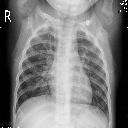

In [5]:
array_to_img(train_images[10])

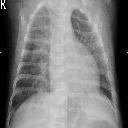

In [6]:
array_to_img(train_images[72])

## Images and Labels

### EDA of the Dataset

In [7]:
#exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 1200
Number of testing samples: 150
Number of validation samples: 16
train_images shape: (1200, 128, 128, 1)
train_labels shape: (1200, 2)
test_images shape: (150, 128, 128, 1)
test_labels shape: (150, 2)
val_images shape: (16, 128, 128, 1)
val_labels shape: (16, 2)


### Images

In [8]:
# # Reshaping the images
# train_images = train_images.reshape(1200, -1).T
# test_images = test_images.reshape(150, -1).T
# val_images = val_images.reshape(16, -1).T

In [9]:
#Reshaping the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)

In [10]:
#Previewing the shape of train_images_unrow
print('Train Images:',np.shape(train_images))
print('Test Images:',np.shape(test_images))
print('Validation Images:',np.shape(val_images))

Train Images: (1200, 16384)
Test Images: (150, 16384)
Validation Images: (16, 16384)


### Labels

In [11]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
# train_labels_final = train_labels.T[[1]]
# test_labels_final = test_labels.T[[1]]
# val_labels_final = val_labels.T[[1]]

In [14]:
train_l = np.reshape(train_labels[:,0], (1200,1))
test_l= np.reshape(test_labels[:,0], (150,1))
val_l = np.reshape(val_labels[:,0], (16,1))

In [15]:
print('Train Labels:',np.shape(train_l))
print('Test Labels:',np.shape(test_l))
print('Validation Labels:',np.shape(val_l))

Train Labels: (1200, 1)
Test Labels: (150, 1)
Validation Labels: (16, 1)


## Baseline Model

### Model

In [16]:
# Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(15, activation='relu', input_shape=(16384,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['acc'])

In [18]:
#Creating History variable
history = model.fit(train_images,
                    train_l,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_images, val_l))

Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 0.5783 - acc: 0.7350 - val_loss: 0.7803 - val_acc: 0.5000
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5360 - acc: 0.7350 - val_loss: 0.8471 - val_acc: 0.5000
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5095 - acc: 0.7350 - val_loss: 0.7089 - val_acc: 0.5625
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4760 - acc: 0.7633 - val_loss: 0.8328 - val_acc: 0.5000
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4873 - acc: 0.7342 - val_loss: 1.0567 - val_acc: 0.5000
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4998 - acc: 0.7733 - val_loss: 1.1244 - val_acc: 0.5000
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4921 - acc: 0.7308 - val_loss: 0.6854 - val_acc: 0.6250
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4472 - 

15/15 [==============================] - 0s 4ms/step - loss: 0.1279 - acc: 0.9508 - val_loss: 0.2389 - val_acc: 0.9375
Epoch 64/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1318 - acc: 0.9483 - val_loss: 0.2146 - val_acc: 0.9375
Epoch 65/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1389 - acc: 0.9500 - val_loss: 0.3781 - val_acc: 0.8125
Epoch 66/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1954 - acc: 0.9150 - val_loss: 0.6169 - val_acc: 0.8125
Epoch 67/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1821 - acc: 0.9250 - val_loss: 0.2847 - val_acc: 0.9375
Epoch 68/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1356 - acc: 0.9467 - val_loss: 0.2849 - val_acc: 0.9375
Epoch 69/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1386 - acc: 0.9442 - val_loss: 0.7745 - val_acc: 0.6875
Epoch 70/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1591 - acc: 0

### Results

In [19]:
result_train = model.evaluate(train_images, train_l)

38/38 [==============================] - 0s 1ms/step - loss: 0.1526 - acc: 0.9417


In [20]:
results_test = model.evaluate(test_images, test_l)

5/5 [==============================] - 0s 1ms/step - loss: 1.7034 - acc: 0.5867


In [21]:
result_train

[0.15259398519992828, 0.9416666626930237]

In [22]:
results_test

[1.7034178972244263, 0.5866666436195374]

## CNN

In [23]:
train_images[0].shape

(16384,)

### Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [25]:
model = models.Sequential()

model.add(Conv2D(64, kernel_size=3, activation= 'relu', input_shape=(128,128,1)))
model.add(Conv2D(32, kernel_size=3, activation= 'relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      18464     
_________________________________________________________________
flatten (Flatten)            (None, 492032)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 984066    
Total params: 1,003,170
Trainable params: 1,003,170
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [28]:
#Creating History variable
history = model.fit(train_images,
                    train_l,
                    epochs=3,
                    validation_data=(val_images, val_l))

Epoch 1/3


ValueError: in user code:

    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 16384]


### Results

In [ ]:
print(val_images.shape)

## Data Augmentation

### Class Imbalance

>Quick EDAs to see the severity of class imbalance

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

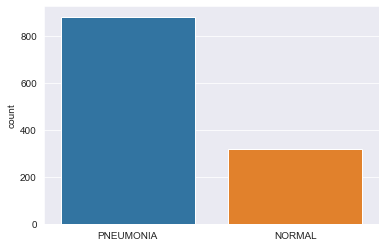

In [31]:
train_case = []
for i in train_labels:
    if(i[1] == 0):
        train_case.append("NORMAL")
    else:
        train_case.append("PNEUMONIA")
sns.countplot(train_case);     

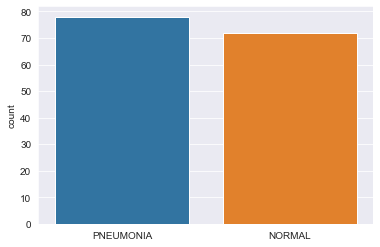

In [32]:
test_case = []
for i in test_labels:
    if(i[1] == 0):
        test_case.append("NORMAL")
    else:
        test_case.append("PNEUMONIA")
sns.countplot(test_case);   

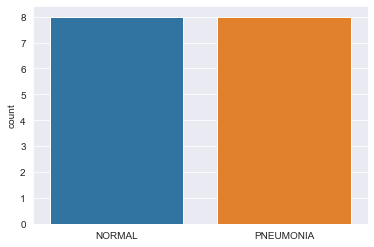

In [33]:
val_case = []
for i in val_labels:
    if(i[1] == 0):
        val_case.append("NORMAL")
    else:
        val_case.append("PNEUMONIA")
sns.countplot(val_case);

Both the train set and test has a severe class imbalance so we will need to preform some data augmentation to create more normal images to match the number of pneumonia images. Whereas the validation set is equal so it will not need any adjustment.

### Augmentation Generator

In [34]:
train_aug_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.3, 
                                   height_shift_range=0.2, 
                                   zoom_range=0.2, 
                                   vertical_flip=True)

In [35]:
test_aug_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.3, 
                                   height_shift_range=0.2,  
                                   zoom_range=0.2, 
                                   vertical_flip=True)

In [36]:
#Get all the data in each generator and reshaping the images
train_generator = train_aug_gen.flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=1200)

test_generator = test_aug_gen.flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=150)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Model

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128,  1)))
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dense_5 (Dense)              (None, 63, 63, 1)         33        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [39]:
history_2 = model.fit(train_generator, 
                      steps_per_epoch=5, 
                      epochs=3, 
                      validation_data=val_generator, 
                      validation_steps=10)

Epoch 1/3


ValueError: in user code:

    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 63, 63, 1) vs (None, None))


### Results

In [ ]:
test_images, test_l = next(test_generator)

In [ ]:
results_test = model.evaluate(test_images, test_l)

In [ ]:
results_test

## Final Model

### Model

### Results

## Conclusion